<a href="https://colab.research.google.com/github/Rugved-vyas18/ad-campaign-success-predictor/blob/main/Campaign_Success_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load dataset (adjust path as needed)
df = pd.read_csv('/content/marketing_campaign_dataset.csv')

# Show first few rows
print(df.head())

# Display dataset shape and basic info
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns")
print(df.info())


   Campaign_ID              Company Campaign_Type Target_Audience Duration  \
0            1  Innovate Industries         Email       Men 18-24  30 days   
1            2       NexGen Systems         Email     Women 35-44  60 days   
2            3    Alpha Innovations    Influencer       Men 25-34  30 days   
3            4   DataTech Solutions       Display        All Ages  60 days   
4            5       NexGen Systems         Email       Men 25-34  15 days   

  Channel_Used  Conversion_Rate Acquisition_Cost   ROI     Location  Language  \
0   Google Ads             0.04       $16,174.00  6.29      Chicago   Spanish   
1   Google Ads             0.12       $11,566.00  5.61     New York    German   
2      YouTube             0.07       $10,200.00  7.18  Los Angeles    French   
3      YouTube             0.11       $12,724.00  5.55        Miami  Mandarin   
4      YouTube             0.05       $16,452.00  6.50  Los Angeles  Mandarin   

   Clicks  Impressions  Engagement_Score    

In [ ]:
df['success'] = (df['Conversion_Rate'] > 0.05).astype(int)
print(df['success'].value_counts())

success
1    21059
0     9954
Name: count, dtype: int64


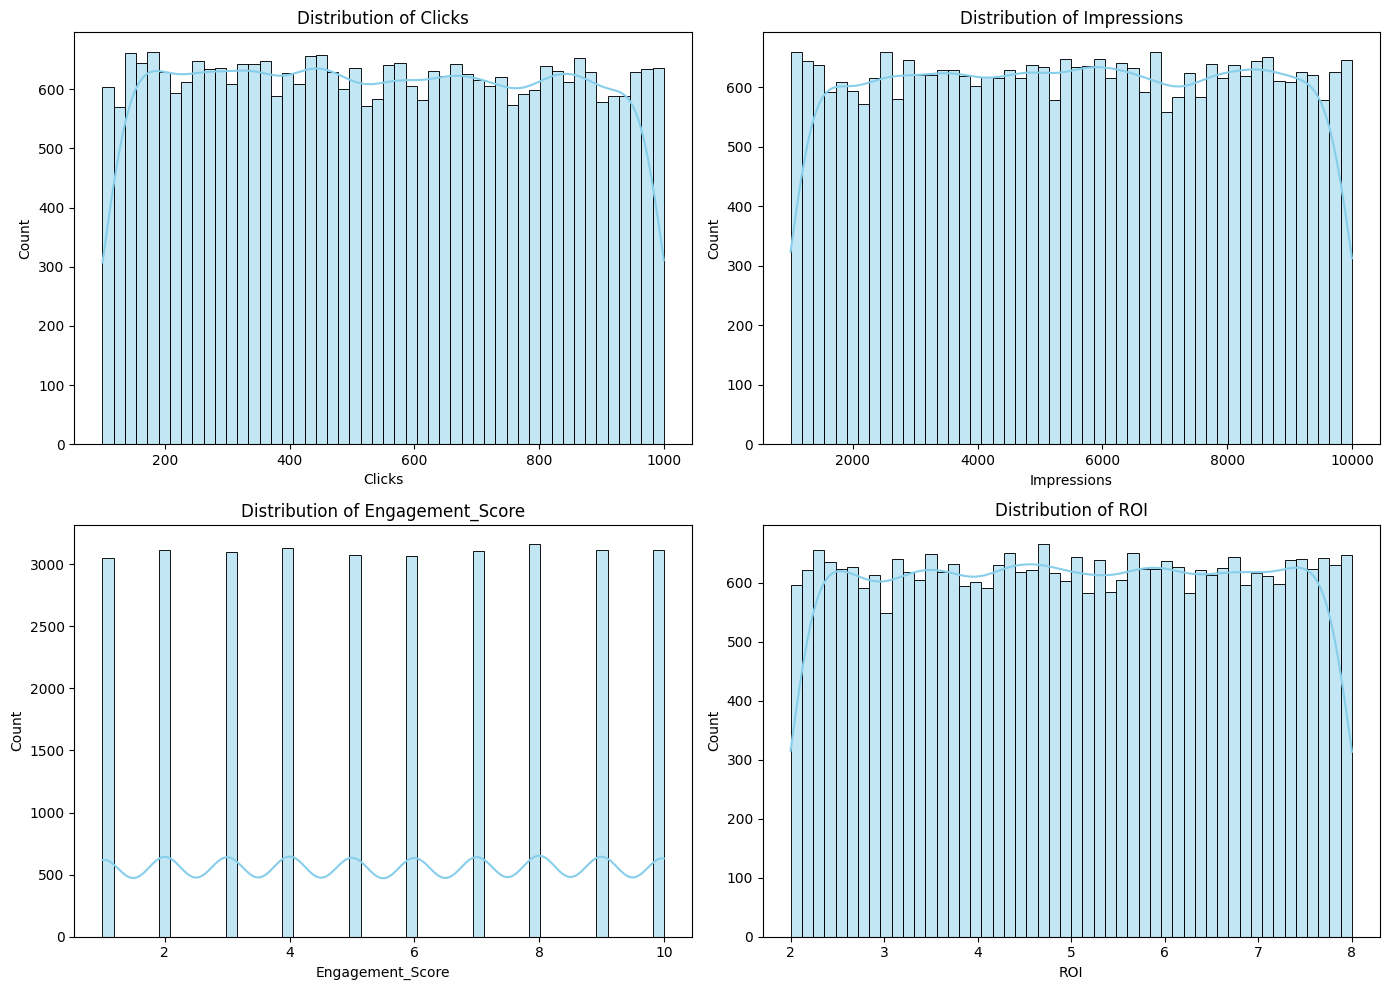

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions of key features
features = ['Clicks', 'Impressions', 'Engagement_Score', 'ROI']

plt.figure(figsize=(14, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=df, x=feature, kde=True, bins=50, color='skyblue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


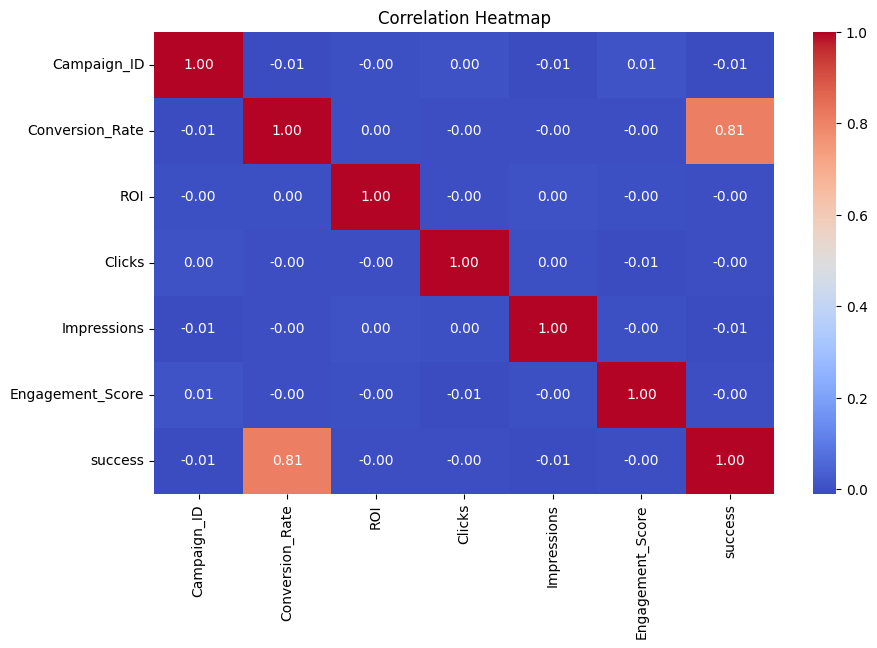

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


/tmp/ipython-input-692761448.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='success', y=feature, data=df, palette='Set2')
/tmp/ipython-input-692761448.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='success', y=feature, data=df, palette='Set2')
/tmp/ipython-input-692761448.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='success', y=feature, data=df, palette='Set2')
/tmp/ipython-input-692761448.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` va

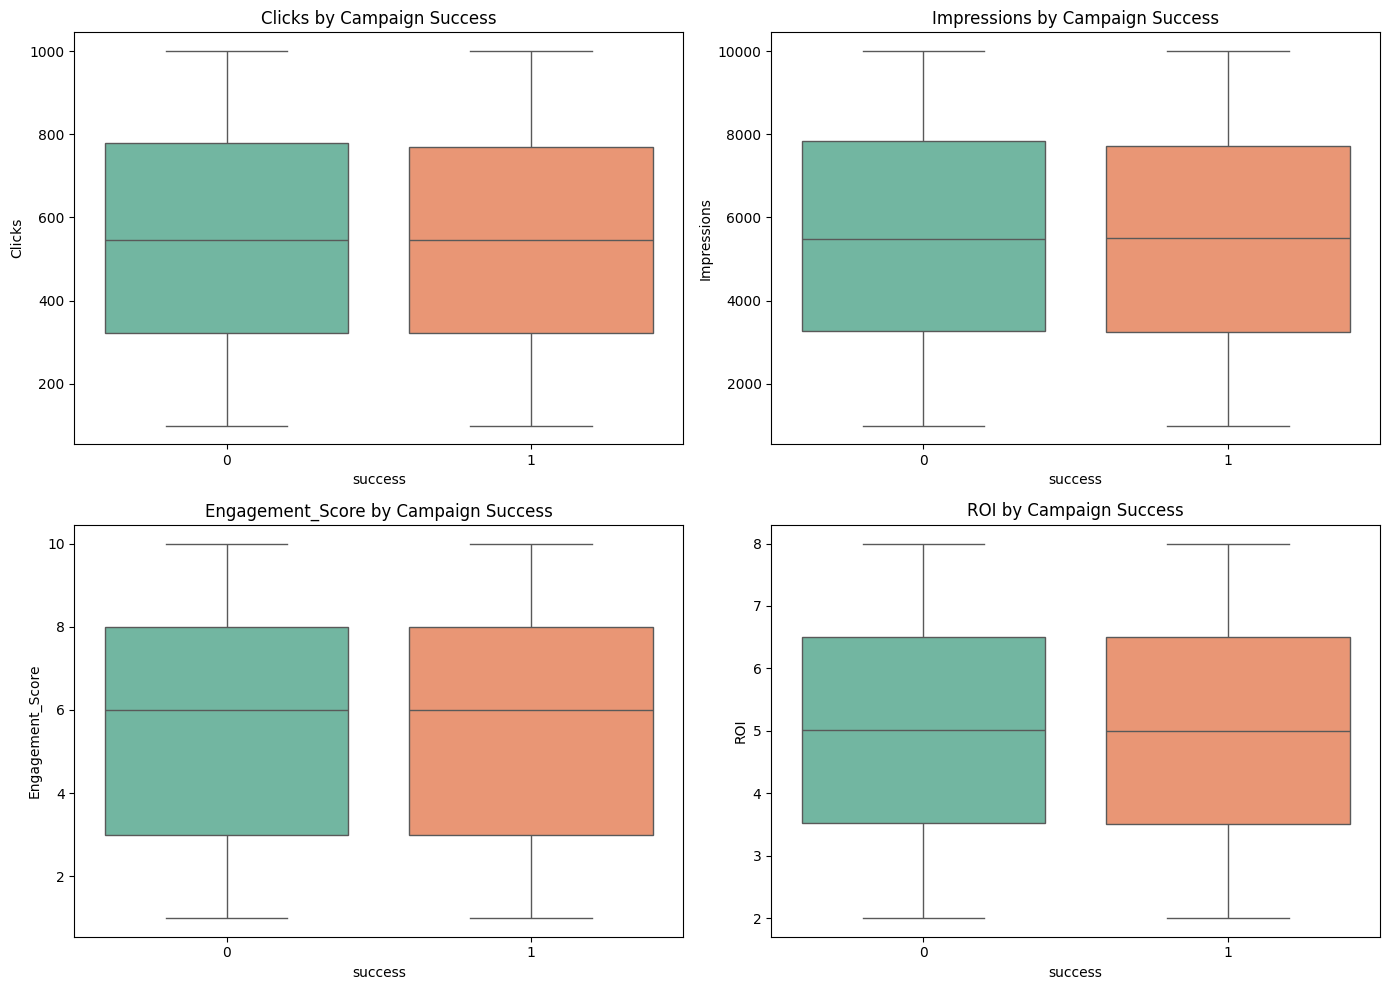

In [ ]:
# Boxplots to compare features by success
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='success', y=feature, data=df, palette='Set2')
    plt.title(f'{feature} by Campaign Success')
plt.tight_layout()
plt.show()


In [ ]:
# Remove $ and , then convert to float
df['Acquisition_Cost'] = df['Acquisition_Cost'].replace('[\$,]', '', regex=True).astype(float)


In [ ]:
df = df.drop(['Campaign_ID', 'Date', 'Company'], axis=1)


In [ ]:
# One-hot encode all object (categorical) columns
df_encoded = pd.get_dummies(df, drop_first=True)


In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_encoded.drop('success', axis=1)
y = df_encoded['success']

# Split into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.value_counts(), '\n', y_test.value_counts())


(24810, 34) (6203, 34)
success
1    16847
0     7963
Name: count, dtype: int64 
 success
1    4212
0    1991
Name: count, dtype: int64


In [ ]:
# Drop Conversion_Rate from both training and testing sets
X_train = X_train.drop(columns=['Conversion_Rate'], errors='ignore')
X_test = X_test.drop(columns=['Conversion_Rate'], errors='ignore')



Confusion Matrix:
[[  16 1975]
 [  44 4168]]

Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.01      0.02      1991
           1       0.68      0.99      0.81      4212

    accuracy                           0.67      6203
   macro avg       0.47      0.50      0.41      6203
weighted avg       0.55      0.67      0.55      6203



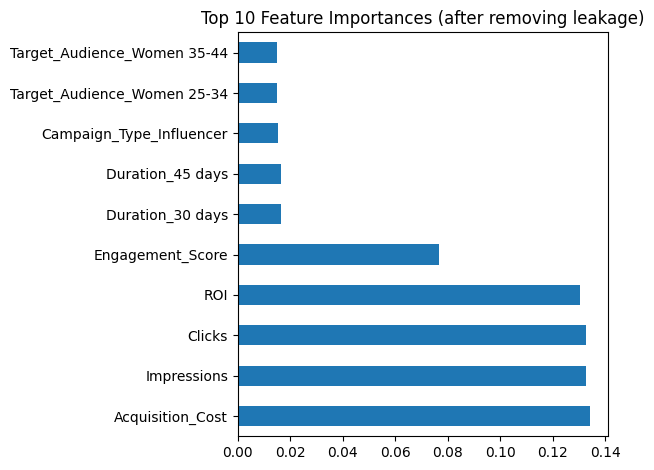

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

# Train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test data
y_pred = rf.predict(X_test)

# Evaluate performance
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot feature importances
importances = rf.feature_importances_
feat_names = X_train.columns
feat_importances = pd.Series(importances, index=feat_names)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances (after removing leakage)")
plt.tight_layout()
plt.show()


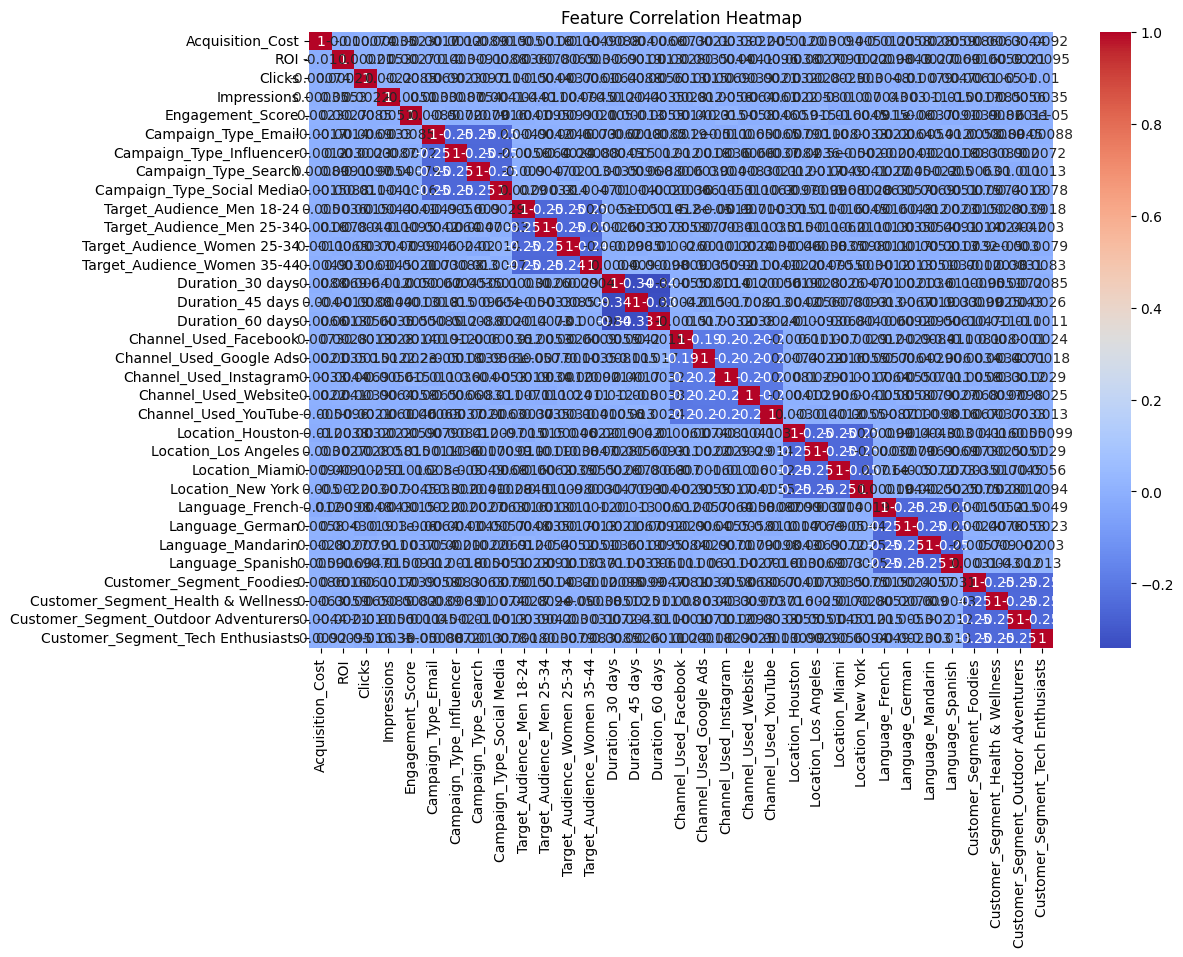

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import time

# Start timing
start_time = time.time()

# Define optimized (smaller) parameter space
param_dist = {
    'n_estimators': randint(50, 150),  # Previously 200–300 (reduced)
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=15,                # Lowered from 25
    cv=3,                     # Reduced folds (5→3)
    scoring='f1_weighted',    # Better for imbalanced multi-class
    n_jobs=-1,                # Use all available CPU cores
    verbose=2,
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Best estimator
best_model = random_search.best_estimator_

# End timing
end_time = time.time()
print(f"\n✅ Model tuning finished in {(end_time - start_time):.2f} seconds")

# Evaluate on test set
from sklearn.metrics import classification_report, accuracy_score

y_pred = best_model.predict(X_test)

print("\n🎯 Classification Report:\n")
print(classification_report(y_test, y_pred))
print(f"✅ Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")

Fitting 3 folds for each of 15 candidates, totalling 45 fits

✅ Model tuning finished in 73.19 seconds

🎯 Classification Report:

              precision    recall  f1-score   support

           0       0.33      0.01      0.02      1991
           1       0.68      0.99      0.81      4212

    accuracy                           0.68      6203
   macro avg       0.51      0.50      0.41      6203
weighted avg       0.57      0.68      0.55      6203

✅ Accuracy: 67.64%


In [ ]:
X = df_encoded.drop('success', axis=1)


In [ ]:
sample_data = {
    'Company': 'NexGen Systems',
    'Campaign_Type': 'Email',
    'Target_Audience': 'Men 25-34',
    'Duration': '30 days',
    'Channel_Used': 'YouTube',
    'Acquisition_Cost': 12000.0,
    'ROI': 5.9,
    'Location': 'New York',
    'Language': 'English',
    'Clicks': 350,
    'Impressions': 4600,
    'Engagement_Score': 6,
    'Customer_Segment': 'Health & Wellness'
}


In [ ]:
import pandas as pd

# Convert to DataFrame
new_input_df = pd.DataFrame([sample_data])

# Match preprocessing steps
new_input_df['Acquisition_Cost'] = new_input_df['Acquisition_Cost'].astype(float)

# Combine with full dataset temporarily for encoding
df_full = pd.concat([df.drop(columns=['success']), new_input_df], ignore_index=True)

# Apply one-hot encoding (same as original df_encoded)
df_full_encoded = pd.get_dummies(df_full)

# Get only the last row (the one we added)
X_new = df_full_encoded.tail(1)

# Align columns to match training data
X_new = X_new.reindex(columns=X_train.columns, fill_value=0)


In [ ]:
# Predict success (0 or 1)
prediction = rf.predict(X_new)
probability = rf.predict_proba(X_new)

print("🎯 Prediction:", 'Success' if prediction[0] == 1 else 'Failure')
print("📊 Probability of Success:", round(probability[0][1]*100, 2), "%")


🎯 Prediction: Success
📊 Probability of Success: 74.0 %


In [ ]:
import pandas as pd

def predict_campaign_success(data: dict) -> str:
    """
    Predicts whether a user will subscribe to the campaign based on input features.
    Args:
        data (dict): A dictionary of campaign features (like one row of input).
    Returns:
        str: "Will Subscribe" or "Will Not Subscribe"
    """
    # Step 1: Convert to DataFrame
    input_df = pd.DataFrame([data])

    # Step 2: Apply preprocessing
    # ⚠️ Replace this block with your real preprocessing pipeline
    # Example:
    # input_df = preprocessor.transform(input_df)
    # If you used LabelEncoder or OneHotEncoding manually, apply same here

    # For demonstration, assuming you already fit an encoder:
    # input_df[categorical_columns] = label_encoder.transform(input_df[categorical_columns])

    # Step 3: Predict
    prediction = best_model.predict(input_df)[0]  # 0 or 1

    # Step 4: Interpret result
    return "Will Subscribe" if prediction == 1 else "Will Not Subscribe"


In [ ]:
# Save the expected feature order from X_train
expected_features = X_train.columns.tolist()


In [ ]:
def prepare_input(raw_dict, expected_features):
    # Convert to DataFrame
    df_input = pd.DataFrame([raw_dict])

    # Preprocess same as training
    df_input['Acquisition_Cost'] = df_input['Acquisition_Cost'].replace('[\$,]', '', regex=True).astype(float)

    # Drop unnecessary columns if still present
    df_input = df_input.drop(['Campaign_ID', 'Date', 'Company'], axis=1, errors='ignore')

    # One-hot encode
    df_input_encoded = pd.get_dummies(df_input)

    # Align with training features
    for col in expected_features:
        if col not in df_input_encoded:
            df_input_encoded[col] = 0

    # Extra columns not seen during training (ignore them)
    df_input_encoded = df_input_encoded[expected_features]

    return df_input_encoded


In [ ]:
def predict_campaign_success(raw_input):
    prepared_input = prepare_input(raw_input, expected_features)
    prediction = rf.predict(prepared_input)[0]
    return "✅ Likely SUCCESSFUL Campaign" if prediction == 1 else "❌ Likely UNSUCCESSFUL Campaign"


In [ ]:
sample_input = {
    'Campaign_Type': 'Email',
    'Target_Audience': 'Men 25-34',
    'Duration': '30 days',
    'Channel_Used': 'Google Ads',
    'Acquisition_Cost': '$12000',
    'ROI': 6.2,
    'Location': 'Chicago',
    'Language': 'Spanish',
    'Clicks': 500,
    'Impressions': 2000,
    'Engagement_Score': 5,
    'Customer_Segment': 'Health & Wellness',
    'Conversion_Rate': 0.04  # optional, gets dropped
}

print(predict_campaign_success(sample_input))


✅ Likely SUCCESSFUL Campaign


In [ ]:
import pickle

# Save model
with open("best_random_forest_model.pkl", "wb") as f:
    pickle.dump(rf, f)

# Save list of expected input features
with open("expected_features_list.pkl", "wb") as f:
    pickle.dump(list(X_train.columns), f)


In [ ]:
samples = [
    {
        'Campaign_Type': 'Email',
        'Target_Audience': 'Men 25-34',
        'Duration': '30 days',
        'Channel_Used': 'Google Ads',
        'Acquisition_Cost': '$12000',
        'ROI': 6.2,
        'Location': 'Chicago',
        'Language': 'Spanish',
        'Clicks': 500,
        'Impressions': 2000,
        'Engagement_Score': 5,
        'Customer_Segment': 'Health & Wellness',
        'Conversion_Rate': 0.04  # gets dropped later
    }
]


In [ ]:
import pandas as pd
import pickle

# Load trained model and expected features
with open("best_random_forest_model.pkl", "rb") as f:
    model = pickle.load(f)

with open("expected_features_list.pkl", "rb") as f:
    expected_features = pickle.load(f)

# Define multiple input samples
samples = [
    {
        'Campaign_Type': 'Email',
        'Target_Audience': 'Men 25-34',
        'Duration': '30 days',
        'Channel_Used': 'Google Ads',
        'Acquisition_Cost': '$12000',
        'ROI': 6.2,
        'Location': 'Chicago',
        'Language': 'Spanish',
        'Clicks': 500,
        'Impressions': 2000,
        'Engagement_Score': 5,
        'Customer_Segment': 'Health & Wellness',
        'Conversion_Rate': 0.04
    },
    {
        'Campaign_Type': 'Social Media',
        'Target_Audience': 'Women 18-24',
        'Duration': '15 days',
        'Channel_Used': 'Facebook',
        'Acquisition_Cost': '$8000',
        'ROI': 3.5,
        'Location': 'Los Angeles',
        'Language': 'English',
        'Clicks': 300,
        'Impressions': 1500,
        'Engagement_Score': 4,
        'Customer_Segment': 'Fashion & Lifestyle',
        'Conversion_Rate': 0.02
    }
]

# Convert to DataFrame
df_input = pd.DataFrame(samples)

# Preprocessing
df_input['Acquisition_Cost'] = df_input['Acquisition_Cost'].replace('[\$,]', '', regex=True).astype(float)
df_input = df_input.drop(columns=['Conversion_Rate'], errors='ignore')

# One-hot encode and align
df_encoded = pd.get_dummies(df_input)
for col in expected_features:
    if col not in df_encoded.columns:
        df_encoded[col] = 0
df_encoded = df_encoded[expected_features]

# Predict
predictions = model.predict(df_encoded)

# Display results
for i, pred in enumerate(predictions):
    label = "✅ Likely SUCCESSFUL Campaign" if pred == 1 else "❌ Likely UNSUCCESSFUL Campaign"
    print(f"Sample {i+1}: {label}")


Sample 1: ✅ Likely SUCCESSFUL Campaign
Sample 2: ✅ Likely SUCCESSFUL Campaign


In [ ]:
!pip install gradio


In [ ]:
import gradio as gr
import pandas as pd
import joblib

# Load your trained model
model = joblib.load("best_random_forest_model.pkl")

# Your preprocessing function
def preprocess_input(df):
    # Drop Conversion_Rate if exists
    df = df.drop(columns=["Conversion_Rate"], errors="ignore")

    # Handle Acquisition_Cost
    df['Acquisition_Cost'] = df['Acquisition_Cost'].replace('[\$,]', '', regex=True).astype(float)

    # Convert categorical columns using one-hot encoding
    cat_cols = df.select_dtypes(include='object').columns
    df = pd.get_dummies(df, columns=cat_cols)

    # Align with training columns
    for col in model.feature_names_in_:
        if col not in df.columns:
            df[col] = 0
    df = df[model.feature_names_in_]

    return df

# Prediction logic
def predict_campaign_success(Campaign_Type, Target_Audience, Duration, Channel_Used,
                              Acquisition_Cost, ROI, Location, Language,
                              Clicks, Impressions, Engagement_Score, Customer_Segment, Conversion_Rate):

    input_data = {
        'Campaign_Type': Campaign_Type,
        'Target_Audience': Target_Audience,
        'Duration': Duration,
        'Channel_Used': Channel_Used,
        'Acquisition_Cost': Acquisition_Cost,
        'ROI': ROI,
        'Location': Location,
        'Language': Language,
        'Clicks': Clicks,
        'Impressions': Impressions,
        'Engagement_Score': Engagement_Score,
        'Customer_Segment': Customer_Segment,
        'Conversion_Rate': Conversion_Rate,
    }

    df = pd.DataFrame([input_data])
    df_processed = preprocess_input(df)
    probability = model.predict_proba(df_processed)[0][1]
    prediction = "✅ Likely SUCCESSFUL Campaign" if probability >= 0.5 else "❌ Likely UNSUCCESSFUL Campaign"
    return f"{prediction}\nConfidence: {probability * 100:.2f}%"

# Gradio UI elements
with gr.Blocks(theme=gr.themes.Soft()) as demo:
    gr.Markdown("# 📊 Campaign Success Predictor")
    gr.Markdown("**Enter your marketing campaign details to predict its success.**")

    with gr.Row():
        with gr.Column():
            Campaign_Type = gr.Dropdown(["Social Media", "Email", "TV", "Radio"], label="Campaign Type")
            Target_Audience = gr.Dropdown(["Men 18-24", "Men 25-34", "Women 25-34", "All 18-35"], label="Target Audience")
            Duration = gr.Dropdown(["7 days", "15 days", "30 days", "60 days"], label="Duration")
            Channel_Used = gr.Dropdown(["Google Ads", "Facebook", "Instagram", "YouTube"], label="Channel Used")
            Acquisition_Cost = gr.Textbox(label="Acquisition Cost (e.g. $12000)")
            ROI = gr.Number(label="Return on Investment (ROI)")
            Location = gr.Textbox(label="Target Location")

        with gr.Column():
            Language = gr.Dropdown(["English", "Spanish", "French"], label="Language")
            Clicks = gr.Number(label="Total Clicks")
            Impressions = gr.Number(label="Total Impressions")
            Engagement_Score = gr.Slider(0, 10, step=1, label="Engagement Score")
            Customer_Segment = gr.Dropdown(["Health & Wellness", "Tech", "Education", "Fashion"], label="Customer Segment")
            Conversion_Rate = gr.Number(label="Conversion Rate (Optional)", value=0.04)

    submit_btn = gr.Button("🚀 Predict")
    output = gr.Textbox(label="Prediction", lines=2, interactive=False)

    submit_btn.click(
        predict_campaign_success,
        inputs=[
            Campaign_Type, Target_Audience, Duration, Channel_Used, Acquisition_Cost,
            ROI, Location, Language, Clicks, Impressions,
            Engagement_Score, Customer_Segment, Conversion_Rate
        ],
        outputs=output
    )

demo.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://087c1b5fa1b149df98.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
